# Map Reduce with Spark - Individual Assignment.

### The code below uses map reduce in spark in order to provide a word count. Your task is to copy and modify the code in order to generate a similar analysis on a book of your choice.

 * Start by picking a book and finding its txt file https://www.gutenberg.org/
 * Ensure the starter code works. This starter code finds and lists the _most frequent single words_ that appear in the book.
 * Create three different map reduce operations that:
 * (1) One task that finds and lists the _longest single words_ used in the book. For example, the word "three" would have a length of "5".
 * (2) Another task that finds and lists the _most frequent bigrams_. A bigram is a pair of words that appear next to each other. For example, the phrase "one two three four" will have the bigrams "one two" "two three" and "three four".
 * (3) Another task that finds and lists a _customized statistic_. Pick any other kind of text counting statistic that you want to use map reduce for. Explain it and then implement it in this notebook.

In [1]:
from pyspark import SparkContext
import pandas as pd

# Create a SparkContext
sc = SparkContext("local", "WordCount")

# Read the text file
text_file = sc.textFile("Bushido.txt")


def split_line(line):
    return line.split(" ")

def map_word_to_one(word):
    return (word, 1)

def add_counts(a, b):
    return a + b

# Split each line into words, map each word to a (word, 1) pair, and reduce by key to count occurrences
word_counts = text_file.flatMap(split_line) \
                       .map(map_word_to_one) \
                       .reduceByKey(add_counts)

word_counts_sorted = word_counts.sortBy(lambda x: x[1], ascending=False)

# Collect the top N words and their counts
top_n = 50  # Adjust this to your desired limit
top_n_words = word_counts_sorted.take(top_n)

# Create a list of tuples (word, count) for the top N words
top_n_word_counts = [(word, count) for word, count in top_n_words]

# Create a Pandas DataFrame from the list of tuples
top_n_df = pd.DataFrame(top_n_word_counts, columns=['word', 'count'])

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/08/05 10:44:13 WARN Utils: Your hostname, Kevins-MacBook-Air-100.local, resolves to a loopback address: 127.0.0.1; using 192.168.1.3 instead (on interface en0)
25/08/05 10:44:13 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/08/05 10:44:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
                                                                                

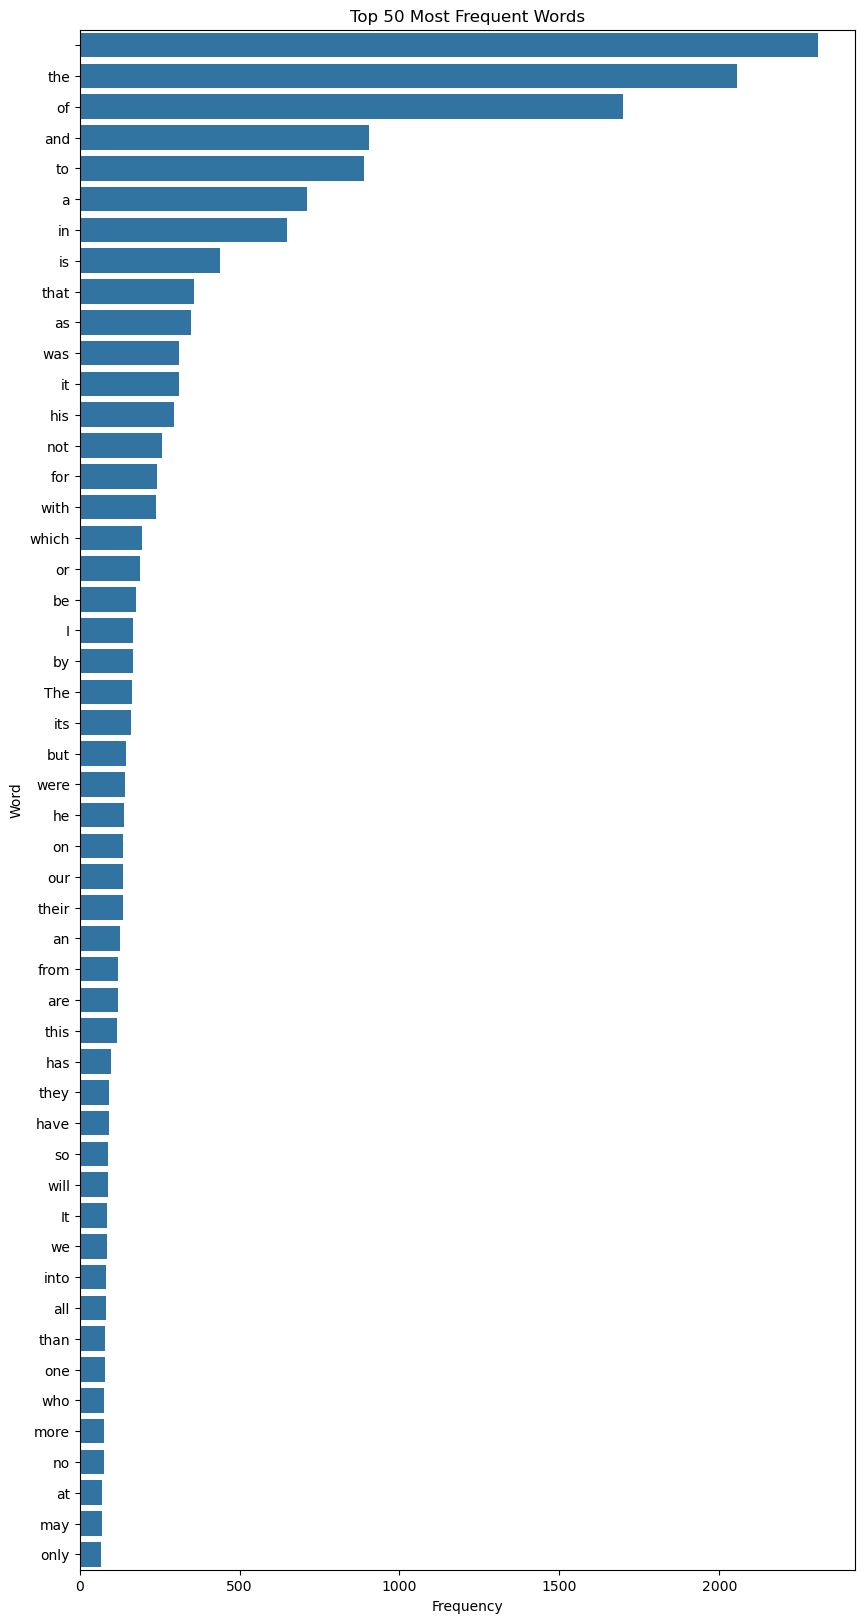

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a bar plot using seaborn
plt.figure(figsize=(10, 20))  # Adjust width and height as needed
sns.barplot(x='count', y='word', data=top_n_df, orient='h')
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

## Task 1: Longest Single Words 

In [11]:
from pyspark import SparkContext
import pandas as pd
import string 
#Helpers to strip punctuation and lowercase
def clean_word(word):
    return word.strip(string.punctuation).lower()
# Get rid of em dashes, keep hyphenated words 
def split_and_clean(line):
    no_emdash = line.replace("—", " ")
    tokens = no_emdash.split()  
    return [clean_word(w) for w in tokens if clean_word(w)]

def is_not_empty(w):
    return w != ""

In [12]:
word_counts = (
    text_file
      .flatMap(split_and_clean)
      .filter(is_not_empty)
      .map(lambda w: (w, 1))
      .reduceByKey(lambda a, b: a + b)
)

# sort descending by count
top50 = word_counts.sortBy(lambda x: x[1], ascending=False).take(50)
pd.DataFrame(top50, columns=["word", "count"])

,word,count
0,the,2264
1,of,1732
2,and,941
3,to,923
4,a,762
5,in,716
6,is,485
7,it,444
8,that,383
9,as,376


In [13]:
long_words = (
    text_file
      .flatMap(split_and_clean)
      .filter(is_not_empty)
      .distinct()
      .map(lambda w: (w, len(w)))
      .sortBy(lambda x: x[1], ascending=False)
)

top_longest = long_words.take(50)
longest_df = pd.DataFrame(top_longest, columns=["word", "length"])
longest_df


,word,length
0,明治三十八年六月二十五日訂正增補第十版發行,21
1,military-knight-ways,20
2,東京市小石川區小日向臺町一丁目七十五番地,20
3,東京市牛込區市ヶ谷加賀町一丁目十二番地,19
4,characteristically,18
5,明治四十一年三月二十五日第十三版發行,18
6,東京市牛込區市ヶ谷加賀町一丁目三番地,18
7,transcendentalism,17
8,conventionalities,17
9,“short-tempered.”,17


## Task 2: Most Frequent Bigrams

In [14]:
def get_bigrams(line):
    tokens = [clean_word(w) for w in line.split() if clean_word(w)]
    # e.g. "a b c" → [("a b",1), ("b c",1)]
    return [(" ".join(tokens[i:i+2]), 1) 
            for i in range(len(tokens) - 1)]

bigram_counts = (
    text_file
      .flatMap(get_bigrams)
      .reduceByKey(lambda a, b: a + b)
      .sortBy(lambda x: x[1], ascending=False)
)

top_bigrams = bigram_counts.take(50)
bigrams_df = pd.DataFrame(top_bigrams, columns=["bigram", "count"])
bigrams_df


,bigram,count
0,of the,328
1,in the,164
2,to the,117
3,it is,93
4,of a,85
5,and the,66
6,is the,60
7,it was,59
8,for the,57
9,on the,53


## Task 3: Customized Statistic

In [15]:
length_dist = (
    text_file
      .flatMap(split_and_clean)
      .filter(is_not_empty)
      .map(lambda w: (len(w), 1))
      .reduceByKey(lambda a, b: a + b)
      .sortBy(lambda x: x[0])        # sort by word-length ascending
)

length_df = pd.DataFrame(length_dist.collect(), columns=["length", "count"])
length_df


,length,count
0,1,983
1,2,6481
2,3,6924
3,4,4951
4,5,3640
5,6,2676
6,7,2688
7,8,1988
8,9,1439
9,10,908
